# Image Classification Data (Fashion-MNIST)

:label:`chapter_fashion_mnist`


In :numref:`chapter_naive_bayes` we trained a naive Bayes classifier on MNIST :cite:`LeCun.Bottou.Bengio.ea.1998` introduced in 1998. Despite its popularity, MNIST is considered as a simple dataset, on which even  simple models achieve classification accuracy over 95%. It is hard to spot the differences between better models and weaker ones. In order to get a better intuition, we will use the qualitatively similar, but comparatively complex Fashion-MNIS dataset :cite:`Xiao.Rasul.Vollgraf.2017` came out in 2017.

## Getting the Data

First, import the packages or modules required in this section.

In [1]:
%matplotlib inline
import d2l
from mxnet import gluon 
import sys

Again, Gluon provides a similar `FashionMNIST` class to download and load this dataset.

In [2]:
mnist_train = gluon.data.vision.FashionMNIST(train=True)
mnist_test = gluon.data.vision.FashionMNIST(train=False)

The number of images for each category in the training set and the testing set is 6,000 and 1,000, respectively. Since there are 10 categories, the numbers of examples in the training set and the test set are 60,000 and 10,000, respectively.

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

Please refer to :numref:`chapter_naive_bayes` for more detailed explanations about accessing these examples and the example format. 

There are 10 categories in Fashion-MNIST: t-shirt, trousers, pullover, dress, coat, sandal, shirt, sneaker, bag and ankle boot. The following function can convert a numeric label into a corresponding text label.

In [4]:
# Save to the d2l package. 
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

Next, let's take a look at the image contents and text labels for the first few examples in the training data set.

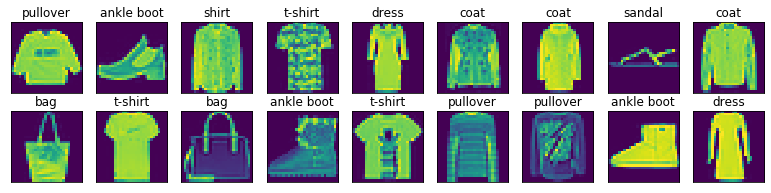

In [5]:
X, y = mnist_train[:18]
d2l.show_images(X.squeeze(axis=-1), 2, 9, titles=get_fashion_mnist_labels(y));

## Reading a Minibatch

To make our life easier when reading from the training and test sets we use a `DataLoader` rather than creating one from scratch, as we did in :numref:`chapter_linear_scratch`. Recall that a data loader reads a mini-batch of data with an example number of `batch_size` each time.

In practice, reading data can often be a significant performance bottleneck for training, especially when the model is simple or when the computer is fast. A handy feature of Gluon's `DataLoader` is the ability to use multiple processes to speed up data reading (not currently supported on Windows). For instance, we can set aside 4 processes to read the data (via `num_workers`).

In [6]:
# Save to the d2l package. 
def get_dataloader_workers(num_workers=4):
    # 0 means no additional process is used to speed up the reading of data.
    if sys.platform.startswith('win'):
        return 0
    else:
        return num_workers

In addition, we convert the image data from uint8 to 32-bit floating point numbers using the `ToTensor` class. Beyond that, it will divide all numbers by 255 so that all pixels have values between 0 and 1. The `ToTensor` class also moves the image channel from the last dimension to the first dimension to facilitate the convolutional neural network calculations introduced later. Through the `transform_first` function of the data set, we apply the transformation of `ToTensor` to the first element of each data example (image and label), i.e., the image.

In [7]:
batch_size = 256
transformer = gluon.data.vision.transforms.ToTensor()
train_iter = gluon.data.DataLoader(mnist_train.transform_first(transformer),
                                   batch_size, shuffle=True,
                                   num_workers=get_dataloader_workers())

Let's look at the time it takes to read the training data.

In [8]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
'%.2f sec' % timer.stop()

'1.25 sec'

## Put all Things Together 

Now we define the `load_data_fashion_mnist` function that obtains and reads the Fashion-MNIST data set. It returns the data iterators for both the training set and validation set. In addition, it accepts an optional argument to resize images to another shape.

In [9]:
# Save to the d2l package. 
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load into memory."""
    dataset = gluon.data.vision
    trans = [dataset.transforms.Resize(resize)] if resize else []
    trans.append(dataset.transforms.ToTensor())
    trans = dataset.transforms.Compose(trans)
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True,
                                  num_workers=get_dataloader_workers()),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False,
                                  num_workers=get_dataloader_workers()))

Verify image resizing works.

In [10]:
train_iter, test_iter = load_data_fashion_mnist(32, (64, 64))
for X, y in train_iter:
    print(X.shape)
    break

(32, 1, 64, 64)


## Summary

* Fashion-MNIST is an apparel classification data set containing 10 categories, which we will use to test the performance of different algorithms in later chapters.
* We store the shape of image using height and width of $h$ and $w$ pixels, respectively, as $h \times w$ or `(h, w)`.
* Data iterators are a key component for efficient performance. Use existing ones if available.

## Exercises

1. Does reducing `batch_size` (for instance, to 1) affect read performance?
1. For non-Windows users, try modifying `num_workers` to see how it affects read performance.
1. Use the MXNet documentation to see which other datasets are available in `mxnet.gluon.data.vision`.
1. Use the MXNet documentation to see which other transformations are available in `mxnet.gluon.data.vision.transforms`.

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2335)

![](../img/qr_fashion-mnist.svg)